# Using numpy vector operations for multiple linear regression

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def predict(x_row, w_vals):
    return np.dot(x_row, w_vals)

In [51]:
def cost(y_rows, x_rows, w_vals):
    predictions = np.dot(x_rows, w_vals)
    errors = y_rows - predictions
    cost_value = np.sum(errors ** 2) / (2 * len(y_rows))
    return cost_value

In [52]:
def gradient_descent(y_rows, x_rows, w_vals, lr):
    predictions = np.dot(x_rows, w_vals)
    errors = predictions - y_rows
    gradients = lr * (1 / (2 * len(y_rows)))  * np.dot(np.transpose(x_rows), errors)
    return w_vals - gradients

In [53]:
def learn(y_rows, x_rows, w_vals, lr, max_iterations, verbose=False, plot=False):
    costs = []
    for i in range(max_iterations):
        w_vals = gradient_descent(y_rows, x_rows, w_vals, lr)
        current_cost = cost(y_rows, x_rows, w_vals)
        costs.append(current_cost)
        if verbose:
            print(f"Iteration: {i} | Cost: {current_cost}")
    if plot:
        plt.plot([_ for _ in range(max_iterations)], costs)
        plt.xlabel("Iteration")
        plt.ylabel("Cost")
        plt.show()
    return w_vals

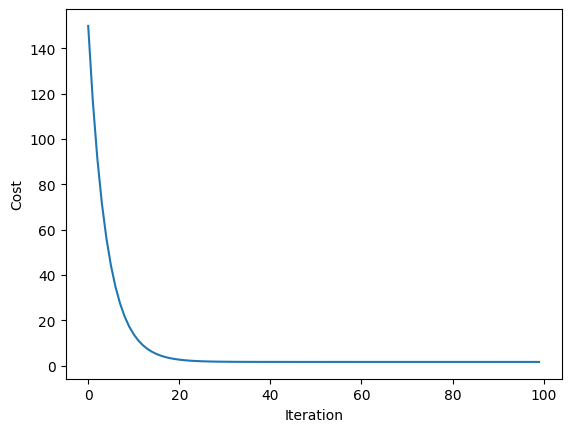

Weights: [2.49375863 1.04361508 0.79182978 0.405482  ]


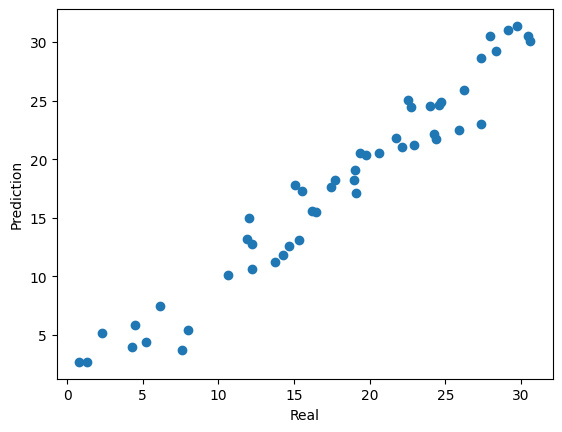

In [54]:
# Reading Data
data = pd.read_csv("data/housing_prices.csv")
data.dropna(inplace=True)

# Defining feature set
features = ['square_feet', 'bed_rooms', 'toilets']

# Extracting data to numpy array
x_cols = [data[key].to_list() for key in features]
x_cols.append([1 for _ in x_cols[0]])
w_vals = np.array([0 for _ in x_cols])

# Training the modal
x_pre_weight = 1
y_pre_weight = 1
x_rows = np.transpose(np.array(x_cols)) * x_pre_weight
y_rows = data['price_in_thousands'].to_numpy() * y_pre_weight
learning_rate = 0.005
max_iterations = 100
w_vals = learn(y_rows, x_rows, w_vals, learning_rate, max_iterations, False, True)

print("Weights:", w_vals)

# Calculating predictions
predictions = np.dot(x_rows, w_vals)

# Predictions vs. real values data set
vals_to_plot = np.transpose(np.array([y_rows, predictions]))
df = pd.DataFrame(vals_to_plot).sort_values(by=0)

# Plotting predictions vs. real values
plt.scatter(x=df[0], y=df[1])
plt.xlabel("Real")
plt.ylabel("Prediction")
plt.show()